# ☕️📚 (프로젝트) 모두카페 꼼꼼히 살펴보기
---

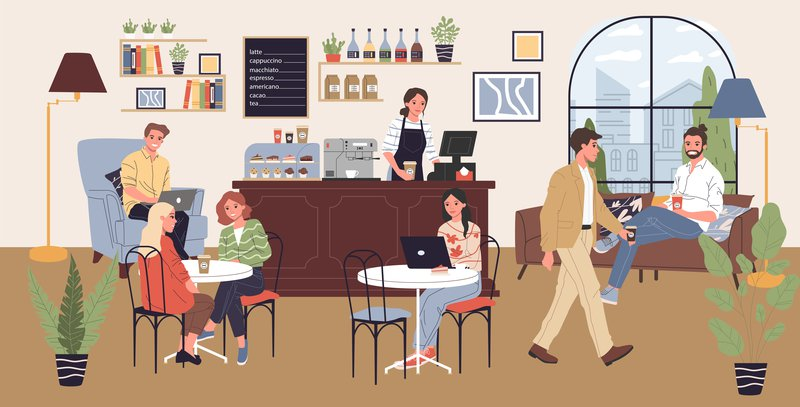

---


## 0. 학습 목표

- 기업이 처한 상황을 인식하고 문제를 정의할 수 있다.
- 문제를 해결하기 위해 필요한 데이터를 인지하고 이해할 수 있다.
- 적절한 분석 기법을 적용해 문제를 해결할 수 있다.

## 1. 상황  인식과 문제 정의

여러분들께 한 가지 중요한 프로젝트를 직접 의뢰하려고 합니다.

사실 저는 '모두카페'라는 작은 스터디 카페를 하나 운영하고 있어요.

규모가 그렇게 크지는 않지만 재미있게 운영하고 있습니다.

그런데 최근 고민이 하나 생겼습니다.

워낙 정신없이 일만 하다보니까 월 매출액 정도만 간신히 알고 있을뿐,

우리 스터디 카페의 매출 추세나 음료와 음식별 판매금액 같은 내용을 전혀 모르고 있어요.

최근 데이터 분석이 굉장히 중요하다고는 들었는데, 구체적으로 무엇을 해야할지, 어디서부터 시작해야할지 막막하기만 합니다.

여러분들이 제 스터디카페 데이터를 한번 분석해주셨으면 좋겠습니다.

그리고 앞으로 '모두카페'가 더 잘되기 위한 운영 전략을 제시해주셨으면 해요.


여러분들께 드리는 데이터는 총 4개 입니다.

- entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터
- sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터
- item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격
- item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

여러분들을 믿고 있겠습니다. 잘 부탁해요.


아! 아래 내용에 대한 시각화는 꼭 포함되어 있어야 합니다.

- 월별 매출액 추세
- 가장 인기있는 음식/음료
- 가장 많이 팔린 입장권 종류

## 2. 문제 정의

- 내 고객은 누구인가?
- 월별 매출액 추세
- 가장 인기있는 음식/음료
- 가장 많이 팔린 입장권 종류
- 장사는 잘 되고 있을까?
- 성장하고 있는가?
- 우리의 장점과 단점은 무엇일까? (SWOT)
- 언제 장사가 제일 잘되고 언제 잘 안될까?
- Q1. 핵심 곡객은?
- 매출액을 올릴려면?
- 매뉴 구성?
- 입장권 셀링 어드바이스?
- 재방문율?
- 사용시간?
- 이벤트?
- 멤버십 프로그램?
- 메뉴에 디테일?

스터디 카페가 잘된다는 것은 :

- 당연히 커피가 잘 팔리고,
- 서비스를 많이 이용해주는 것이다.
- 결국은 돈을 많이 버는 거겠죠?

잘되려면,

1. 커피가 맛있야하고, 사람들이 오고 싶어할 만한 장소가 되어야한다
2. 고객이 당연히 만족하는 서비스가 제공이 되어야한다
3. 사람들은 무엇에 만족할까? 가성비? 가격만큼 뭔가를 해준다?
4. 시스템이 제대로 되어 있다?
5. 새로운것들이 많다?
6. 사람들이 소문을 내줘야한다, 입소문도 좋고 온라인 블로그도 좋다
7. 강의도 많이 들어야하겠지? 그럼 유익한 강의는 무엇일까? 인기 강의?

내 고객의 특성은 무엇인가?

- 어느 시간에 많이 이용하는가
- 무엇을 많이 먹는가, 시키는가
- 어떤 서비스를 많이 듣는가?
- 신규 고객이 많은가?
- 재방문율은 ?
- 특정 시간에 이용하는 고객이 서비스 선택이 달라지는가?
- 결제는 어느 위치에서 많이 이용하는가?
- 카페별로 특징이 있는가?



* 그럼 결론적으로 내 핵심 고객은?(돈을 많이 벌어다주는, 잠재 고객?)

## 3. 데이터 분석

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')

In [7]:
entry_data = pd.read_csv('../data/entry_data.csv')
sales_data = pd.read_csv('../data/sales_data.csv')
item_data = pd.read_csv('../data/item_data.csv')
item_entry_data = pd.read_csv('../data/item_entry_data.csv')

In [8]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [26]:
entry_data.shape[0] - len(entry_data.고객.unique())

17151

In [18]:
sales_data.head()
# print(sales_data.shape)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [15]:
item_data.분류.value_counts()

음식            60
차가운음료(커피외)    34
커피            29
스무디&쉐이크       19
따뜻한음료(커피외)    16
디저트           12
포장             3
게임&TV          1
Name: 분류, dtype: int64

In [16]:
item_entry_data.분류.value_counts()

심야-조조    10
일반인       8
한국대생      7
18시이후     4
기본        3
기본그룹      2
Name: 분류, dtype: int64

In [27]:
temp_var = sales_data

In [28]:
temp_var['date'] = sales_data['결제일시'].str[:7]

In [29]:
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '')

In [30]:
temp_var['payment'] = sales_data['결제금액'].astype(int)

In [31]:
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

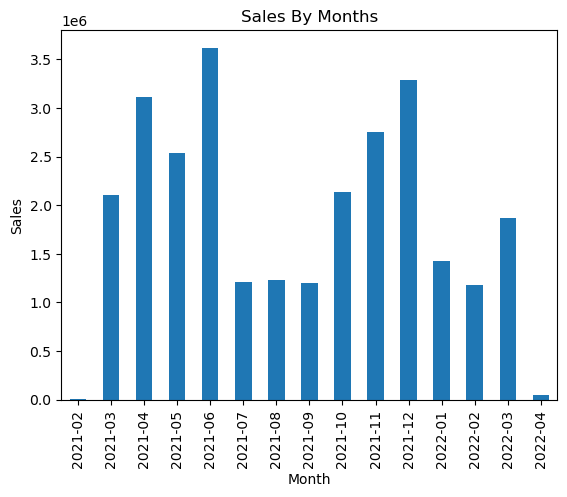

In [32]:
# 집계 결과를 시각화하기
ax = payment_data.plot(kind='bar')

plt.title('Sales By Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [33]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
items_count = temp_var[temp_var['판매수량']!=-1].value_counts()
items_count

결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date     payment
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10  500        4
                        라면          현금    결제완료  1     4000  customer803089  2021-10  4000       4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10  500        4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06  4000       4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06  500        3
                                                                                               ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06  500        1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06  5000       1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06  5000       1
2021-06-13 10:00  선불기1  김

In [34]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count[:10]

0
결제일시             판매위치 상품명   결제방식 비고   판매수량 결제금액 고객             date    payment   
2021-10-05 13:33 선불기1 치즈추가  현금   결제완료 1    500  customer803089 2021-10 500      4
                      라면    현금   결제완료 1    4000 customer803089 2021-10 4000     4
2021-10-07 10:05 선불기1 시럽추가  신용카드 결제완료 1    500  customer777135 2021-10 500      4
2021-06-19 21:02 선불기1 라면    신용카드 결제완료 1    4000 customer283589 2021-06 4000     4
2021-06-14 11:37 선불기1 치즈추가  신용카드 결제완료 1    500  customer950393 2021-06 500      3
2021-03-23 13:41 선불기1 계란추가  신용카드 결제완료 1    500  customer556974 2021-03 500      3
2021-11-29 19:20 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer975556 2021-11 5000     3
2021-06-16 12:17 선불기1 라면    신용카드 결제완료 1    4000 customer996256 2021-06 4000     3
2021-08-22 17:12 선불기1 라면    신용카드 결제완료 1    4000 customer439220 2021-08 4000     3
2021-04-25 18:31 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer304481 2021-04 5000     3

In [55]:
# # 한글이 포함된 시각화를 위해 Matplotlib 설정
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumGothicOTF') 
# mpl.font_manager.findfont(font)
# print("완료!")

완료!


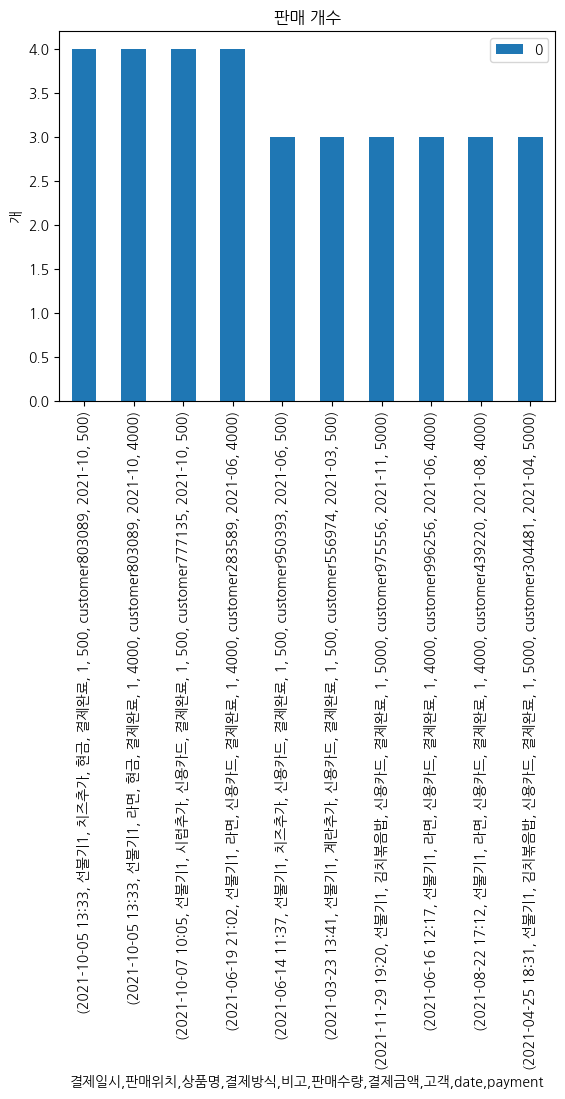

In [58]:
# 집계 결과를 시각화하기
items_count[:10].plot(kind='bar')
plt.ylabel('개')
plt.title('판매 개수')
plt.show()

In [64]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: payment, dtype: int64

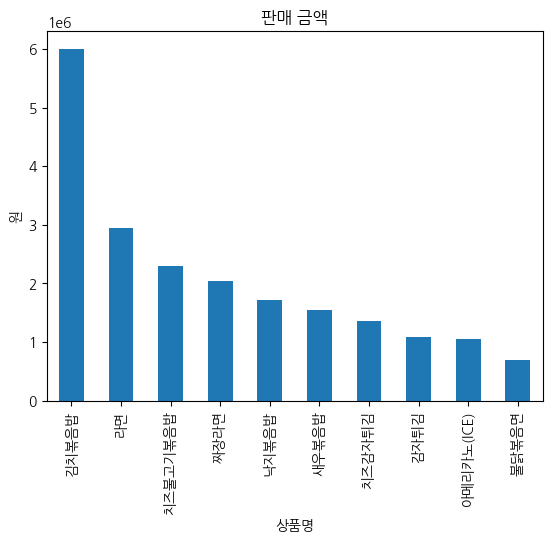

In [65]:
# 집계 결과 시각화하기
items_payment[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

In [66]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,payment
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,4500.0
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,5500.0
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,4000.0
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,1000.0
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,5000.0
...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,NaN
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,NaN
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,NaN
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,NaN


In [67]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)

In [68]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [69]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

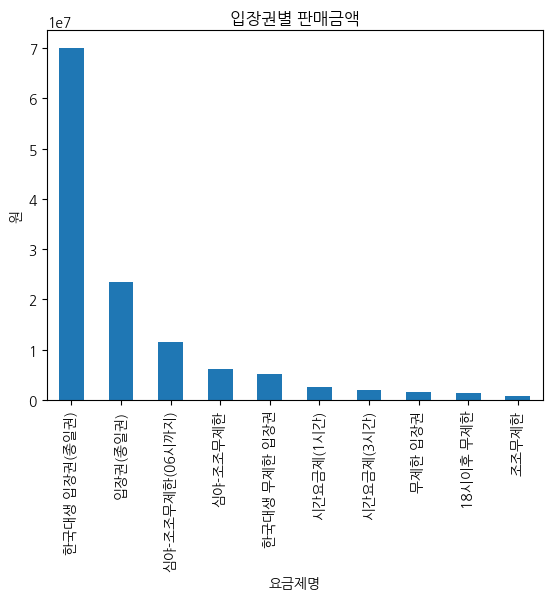

In [70]:
# 집계 결과 시각화하기
tickets[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('입장권별 판매금액')
plt.show()